# ATIVIDADE 2

Você recebeu um arquivo pacientes_clinica.csv com dados de pacientes de uma clínica de saúde.
O arquivo contém valores nulos e informações de idade, peso, pressão arterial e nível de glicose.

## 1. LENDO ARQUIVO

In [8]:
from tkinter.constants import RIGHT

import matplotlib.pyplot as plt
import pandas as pd
from pandas.conftest import observed

FILEPATH = 'https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/pacientes.csv'
ENCODING = 'utf-8'
SEPARATOR = ','

try:
    df = pd.read_csv(filepath_or_buffer=FILEPATH, sep=SEPARATOR, encoding=ENCODING)
    display(df)
except FileNotFoundError:
    display('File not found')
    exit()

,ID,Nome,Idade,Genero,Peso,Glicose,Pressao,Mes
0,1,João,34,M,80,95.0,120.0,Jan
1,2,Ana,45,F,72,110.0,130.0,Jan
2,3,Pedro,51,M,90,NaN,140.0,Fev
3,4,Cassio,29,M,60,88.0,115.0,Fev
4,5,Carlos,63,M,85,NaN,150.0,Mar
...,...,...,...,...,...,...,...,...
65,66,Érica,34,F,62,90.0,118.0,Set
66,67,Ramon,52,M,88,107.0,141.0,Out
67,68,Jéssica,38,F,67,95.0,123.0,Out
68,69,Anderson,59,M,91,111.0,146.0,Nov


## 2. TRATANDO OS DADOS

### 2.1. VERIFICANDO NULOS

In [9]:
df.isnull().sum()

ID         0
Nome       0
Idade      0
Genero     0
Peso       0
Glicose    8
Pressao    5
Mes        0
dtype: int64

### 2.2. SUBSTITUINDO COLUNAS COM VALORES NULOS PELA MÉDIA

In [10]:
GLICOSE_WITH_NULL_VALUES = 'Glicose'
PRESSURE_WITH_NULL_VALUES = 'Pressao'

glicose_mean = df[GLICOSE_WITH_NULL_VALUES].mean()
pressure_mean = df[PRESSURE_WITH_NULL_VALUES].mean()

clean_df = df.copy()
clean_df[GLICOSE_WITH_NULL_VALUES] = clean_df[GLICOSE_WITH_NULL_VALUES].fillna(glicose_mean)
clean_df[PRESSURE_WITH_NULL_VALUES] = clean_df[PRESSURE_WITH_NULL_VALUES].fillna(pressure_mean)

display(clean_df)

,ID,Nome,Idade,Genero,Peso,Glicose,Pressao,Mes
0,1,João,34,M,80,95.000000,120.0,Jan
1,2,Ana,45,F,72,110.000000,130.0,Jan
2,3,Pedro,51,M,90,99.741935,140.0,Fev
3,4,Cassio,29,M,60,88.000000,115.0,Fev
4,5,Carlos,63,M,85,99.741935,150.0,Mar
...,...,...,...,...,...,...,...,...
65,66,Érica,34,F,62,90.000000,118.0,Set
66,67,Ramon,52,M,88,107.000000,141.0,Out
67,68,Jéssica,38,F,67,95.000000,123.0,Out
68,69,Anderson,59,M,91,111.000000,146.0,Nov


In [ ]:
# CHECKS

# display(f"Glicose Mean used for imputation: {glicose_mean:.2f}")
# display(f"New Glicose column mean (with filled nulls): {clean_df['Glicose'].mean():.2f}")
# display("=================")
# display(f"Pressure Mean used for imputation: {pressure_mean:.2f}")
# display(f"New Pressure column mean (with filled nulls): {clean_df['Pressao'].mean():.1f}")

## 3. GRÁFICOS

### 3.1. MÉDIA DE GLICOSE POR FAIXA ETÁRIA (BAR CHART)

#### 3.1.1. GERANDO NOVA COLUNA - FAIXA ETÁRIA

In [14]:
AGE_COLUMN = 'Idade'
NEW_AGE_RANGE_COLUMN = 'Faixa Etária'

BINS = [0, 30, 40, 50, 60, 100]
LABELS = ['Até 30', '31-40', '41-50', '51-60', '61+']
RIGHT = True
INCLUDE_LOWEST = True
ORDERED = True

clean_df[NEW_AGE_RANGE_COLUMN] = pd.cut(
    clean_df[AGE_COLUMN],
    bins=BINS,
    labels=LABELS,
    right=RIGHT,
    include_lowest=INCLUDE_LOWEST,
    ordered=ORDERED
)

display(clean_df.head())

,ID,Nome,Idade,Genero,Peso,Glicose,Pressao,Mes,Faixa Etária
0,1,João,34,M,80,95.000000,120.0,Jan,31-40
1,2,Ana,45,F,72,110.000000,130.0,Jan,41-50
2,3,Pedro,51,M,90,99.741935,140.0,Fev,51-60
3,4,Cassio,29,M,60,88.000000,115.0,Fev,Até 30
4,5,Carlos,63,M,85,99.741935,150.0,Mar,61+


#### 3.1.2. AGRUPANDO MÉDIA DE GLICOSE POR FAIXA ETÁRIA

In [17]:
GLICOSE_COLUMN = 'Glicose'
OBSERVED = True

df_mean_glicose_by_age = clean_df.groupby(by=NEW_AGE_RANGE_COLUMN, observed=OBSERVED)[GLICOSE_COLUMN].mean()
df_mean_glicose_by_age

Faixa Etária
Até 30     86.400000
31-40      93.958710
41-50     101.393888
51-60     108.096774
61+       109.580645
Name: Glicose, dtype: float64

#### 3.1.3. TRAÇANDO GRÁFICO

In [19]:
KIND = 'bar'
COLOR = 'blue'
FIGSIZE = (10,6)
TITLE = 'Média de Glicose por Faixa Etária'
XLABEL = 'Faixa Etária'
YLABEL = 'Média de Glicose (mg/dL)'
ROTATION = 0

GRID_LINESTYLE = '--'
GRID_ALPHA = 0.6

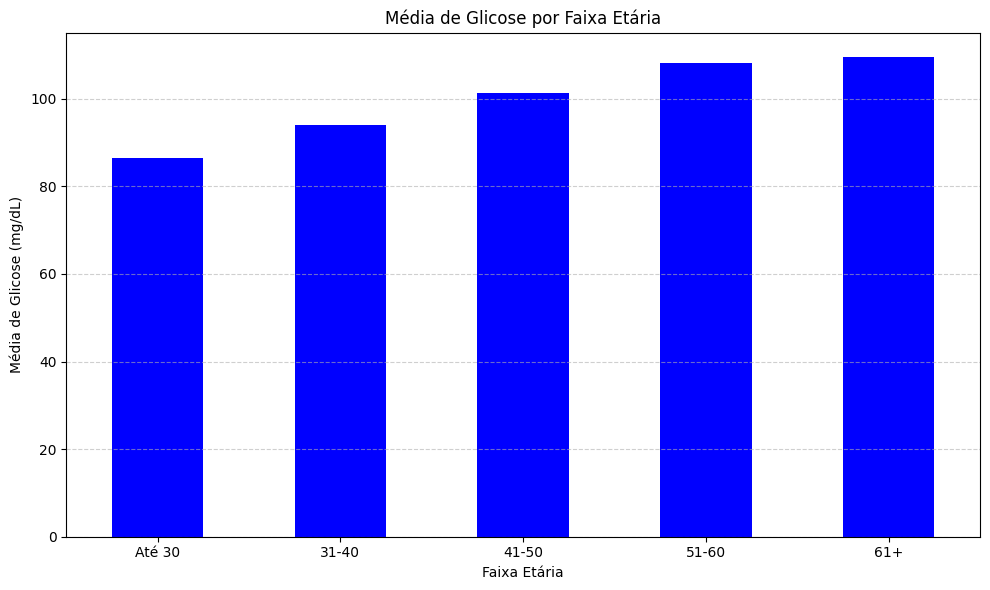

In [20]:
df_mean_glicose_by_age.plot(
    kind=KIND,
    color=COLOR,
    figsize=FIGSIZE,
    title=TITLE,
    xlabel=XLABEL,
    ylabel=YLABEL,
    rot=ROTATION
)
plt.tight_layout()
plt.grid(axis='y', linestyle=GRID_LINESTYLE, alpha=GRID_ALPHA)
plt.show()

### 3.2. PROPORÇÃO DE PACIENTES POR GÊNERO (PIE CHART)

#### 3.2.1. AGRUPANDO PACIENTES POR GÊNERO

In [32]:
GENDER_COLUMN = 'Genero'

df_patients_by_gender = clean_df[GENDER_COLUMN].value_counts()
display(df_patients_by_gender)

Genero
M    37
F    33
Name: count, dtype: int64

#### 3.2.2. TRAÇANDO GRÁFICO

In [25]:
KIND = 'pie'
FIGSIZE = (8,5)
TITLE = 'Proporção de Pacientes por Gênero'
YLABEL = ''
AUTOPCT = '%1.2f%%'
STARTANGLE = 90

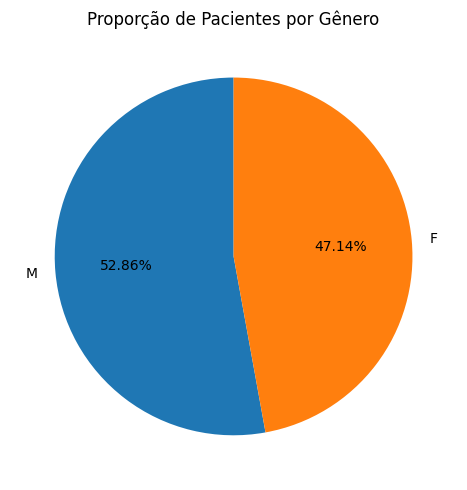

In [26]:
df_patients_by_gender.plot(
    kind=KIND,
    figsize=FIGSIZE,
    title=TITLE,
    ylabel=YLABEL,
    autopct=AUTOPCT,
    startangle=STARTANGLE,
)
plt.tight_layout()
plt.show()

### 3.3. EVOLUÇÃO MÉDIA DA PRESSÃO ARTERIAL POR MÊS (LINE CHART)

#### 3.3.1. COLOCANDO MÊS EM ORDEM CALENDÁRIO

In [36]:
MONTH_COLUMN = 'Mes'
MONTH_ORDER = [
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
]
ORDERED = True

clean_df[MONTH_COLUMN] = pd.Categorical(
    values=clean_df[MONTH_COLUMN],
    categories=MONTH_ORDER,
    ordered=ORDERED
)

display(clean_df.head())

,ID,Nome,Idade,Genero,Peso,Glicose,Pressao,Mes,Faixa Etária
0,1,João,34,M,80,95.000000,120.0,Jan,31-40
1,2,Ana,45,F,72,110.000000,130.0,Jan,41-50
2,3,Pedro,51,M,90,99.741935,140.0,Fev,51-60
3,4,Cassio,29,M,60,88.000000,115.0,Fev,Até 30
4,5,Carlos,63,M,85,99.741935,150.0,Mar,61+


#### 3.3.2. AGRUPANDO MÉDIA DE PRESSÃO ARTERIAL POR MÊS

In [41]:
PRESSURE_COLUMN = 'Pressao'
OBSERVED = True

df_average_pressure_by_month = clean_df.groupby(by=MONTH_COLUMN, observed=OBSERVED)[PRESSURE_COLUMN].mean()
display(df_average_pressure_by_month)

Mes
Jan    126.166667
Fev    129.666667
Mar    133.000000
Abr    129.166667
Mai    131.910256
Jun    132.320513
Jul    128.666667
Ago    131.500000
Set    133.910256
Out    132.833333
Nov    124.833333
Dez    132.115385
Name: Pressao, dtype: float64

#### 3.3.3. TRAÇANDO GRÁFICO

In [45]:
KIND = 'line'
FIGSIZE = (8,5)
TITLE = 'Evolução Média da Pressão Arterial por Mês'
LEGEND = True
XLABEL = 'Mês'
YLABEL = 'Média da Pressão Arterial (mmHg)'
ROTATION = 0 # horizontal
MARKER = 'o'

ENABLE_GRID = True
GRID_LINESTYLE = '--'
GRID_ALPHA = 0.6

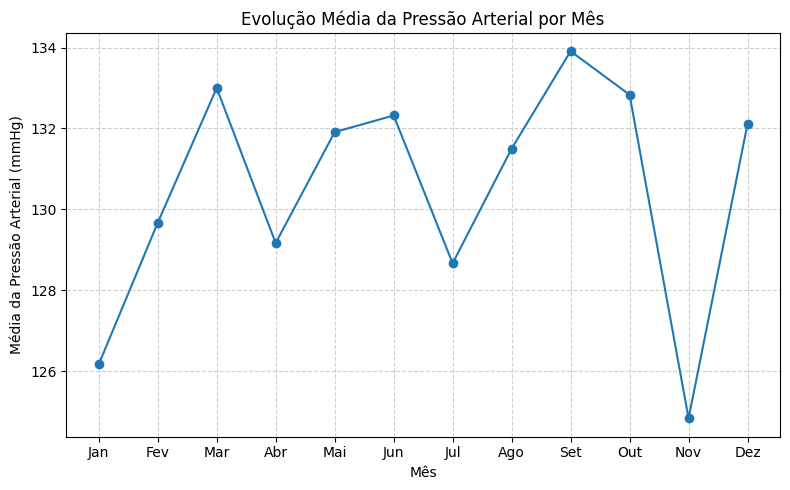

In [49]:
ax = df_average_pressure_by_month.plot(
    kind=KIND,
    figsize=FIGSIZE,
    title=TITLE,
    xlabel=XLABEL,
    ylabel=YLABEL,
    rot=ROTATION,
    marker=MARKER
)

tick_locations = range(len(df_average_pressure_by_month.index))
month_labels = df_average_pressure_by_month.index

ax.set_xticks(tick_locations)
ax.set_xticklabels(labels=month_labels, rotation=ROTATION)

plt.tight_layout()
plt.grid(ENABLE_GRID, linestyle=GRID_LINESTYLE, alpha=GRID_ALPHA)
plt.show()